## Otimização com algoritmo de subida da colina

Considere a função abaixo:
```code
g(x) = (2^(-2 ((x−0.1)/0.9)^2)) ((sin(5πx))^6)
```

e sua versão em Python:

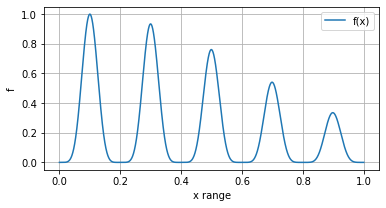

In [32]:
from random import random
from math import exp
import math
import time
import numpy as np
import matplotlib.pyplot as plt



def f(x):
    # Aplica função demonstrada na primeira célula desse notebook
    part1 = 2**(-2 * (((x - 0.1) / 0.9) ** 2))
    part2 = math.sin(5*math.pi*x)**6
    
    return part1 * part2


# Cria uma representação da função entre 0 e 1 com 10 mil pontos calculados
# e apresenta o gráfico que será base para acompanhamento posterior
# da subida da colina
x = np.linspace(start=0.0, stop=1.0, num=10000)
y = np.empty([x.shape[0]])

for i in range(len(x)):
    # Carrega função no vetor y
    result = f(x[i])
    y[i] = result
    
    
def plot(dot: list = None):
    time.sleep(1)
    plt.figure(figsize=[6,3])
    plt.plot(x, y, label='f(x)')
    
    if dot:
        plt.plot(dot[0], dot[1],'yo')
        
    plt.ylabel('f')
    plt.xlabel('x range')
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot()

In [30]:
def N(i):
    # Recebe um numero e pertuba um valor para esquerda
    # caso a vizinhança da esquerda seja tenha um valor maior
    # ou para direita caso contrário
    r = i * 1.01
    l = i * 0.99
    
    if f(l) > f(i):
        return l
    elif f(l) < f(i):
        return r
    else: 
        return None

def hill_climbing():
    i = random()
    
    while True:
        s = N(i)
        plot([i, f(i)])
        
        if f(s) > f(i):
            # Se novo vizinho for maior que atual
            # atual passa ser o novo vizinho senão fim do loop
            i = s
            continue
        
        break
            
    return [i, f(i)]


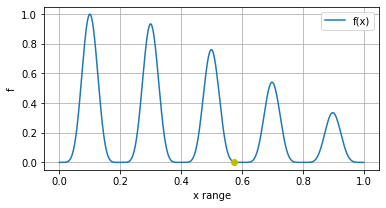

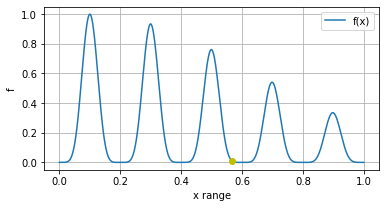

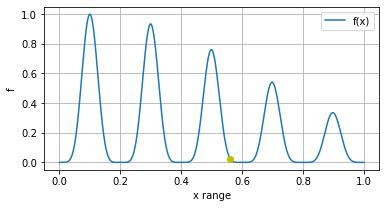

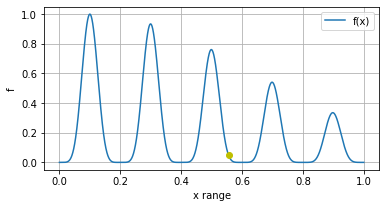

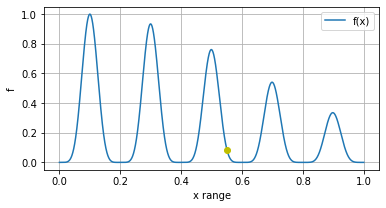

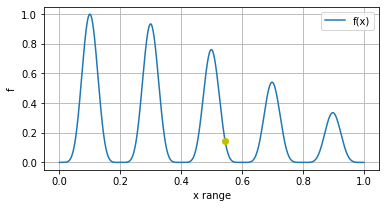

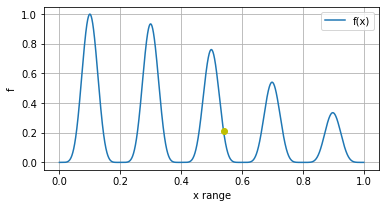

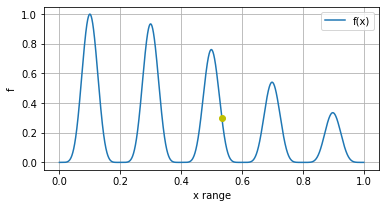

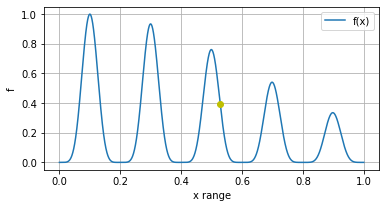

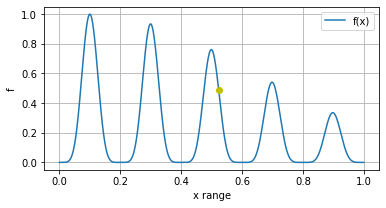

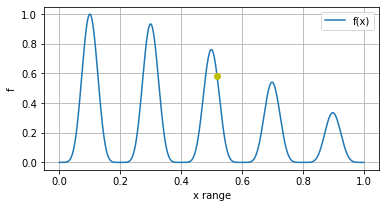

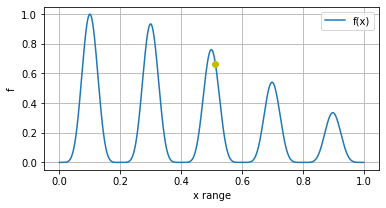

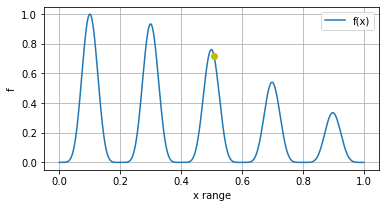

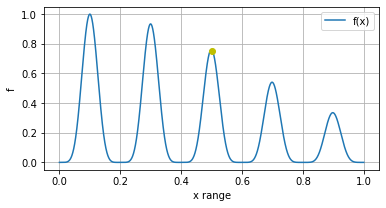

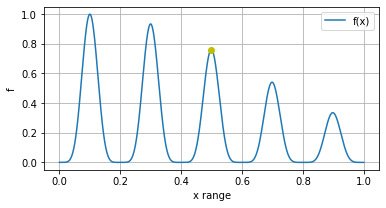

[0.49757762635103703, 0.7596679231983449]

In [31]:
hill_climbing()

In [76]:
def NRandom(i):
    # Recebe um numero e pertuba um valor para esquerda ou direita
    # de maneira aleatoria
    r = i * 1.3
    l = i * 0.7
    
    if r > 1:
        r = 1
    if l < 0:
        l = 0
    
    return r if random() > 0.5 else l
    

T = 20

def stochastic_hill_climbing():
    i = random()
    it = 10
    
    while it > 0 and (f(i) < 0.7):
        s = NRandom(i)
        plot([i, f(i)])
        
        if random() < (1/(1+(exp((f(i) - f(s))/T)))):
            i = s
            
        it -= 1
        
    plot([i, f(i)])
    return [i, f(i)]

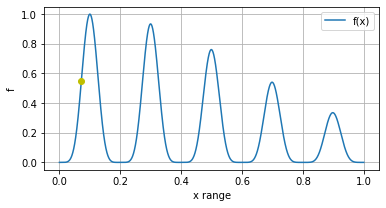

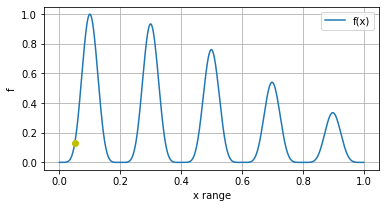

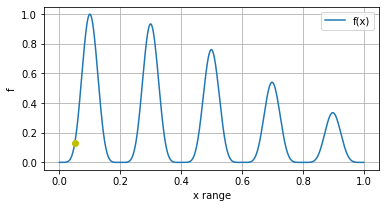

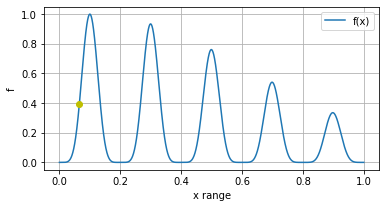

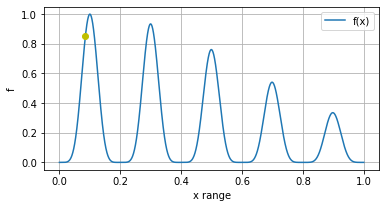

[0.08526924422940442, 0.8500587965568156]

In [77]:
stochastic_hill_climbing()